# TestCase 1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config1.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 1
# version : 2
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 1
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

In [8]:
if version == 1:
    from testcases.networks.test_2D.test_1.test_1_v1 import Run_laplacian2D,Poisson_2D
elif version == 2:
    from testcases.networks.test_2D.test_1.test_1_v2 import Run_laplacian2D,Poisson_2D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_2D import TestCase1
problem = TestCase1(version=version)

Using device: cpu
torch loaded; device is cpu


/home/u2/lecourtier/Article1/code
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe1_v2.pth
network loaded
Error  tensor([0.0029])


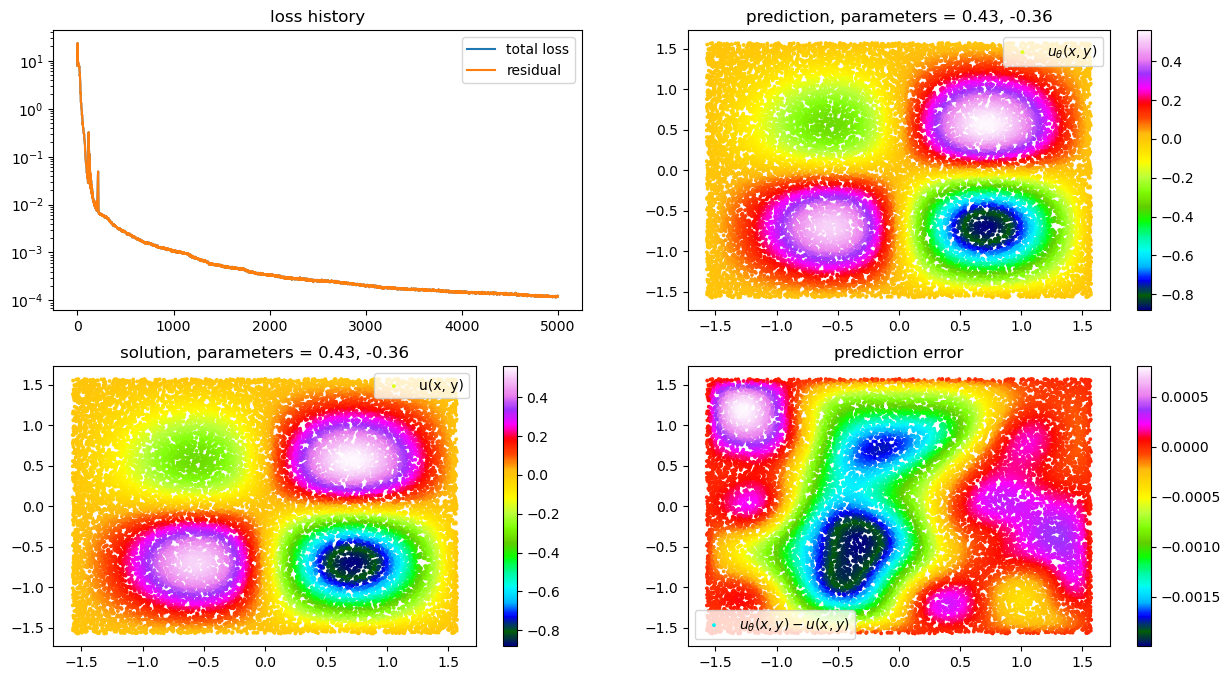

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [23]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

[array([0.05, 0.22])]
## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/cvg/param1/


### Run FEM

In [24]:
# degree = 1
# df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=True)

## Run error estimation with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
V created with  16  vertices and degree  1  : h = 0.29619219587722484
V_theta created with  16  vertices and degree  10
Building point search tree to accelerate distance queries.
nb_vert=16, norme_L2=0.05950235151185719
V created with  32  vertices and degree  1  : h = 0.1433188044567221
Computed bounding box tree with 899 nodes for 450 points.
V_theta created with  32  vertices and degree  10
nb_vert=32, norme_L2=0.014391254847605001
V created with  64  vertices and degree  1  : h = 0.07052195139934005
V_theta created with  64  vertices and degree  10
nb_vert=64, norme_L2=0.003514112029270821
V created with  128  vertices and degree  1  : h = 0.03498333022172013
V_theta created with  128  vertices and degree  10
nb_vert=128, norme_L2=0.0008681899099250415
V created with  256  vertices and degree  1  : h = 0.017423070345719664
V_theta created with  256  vertices a

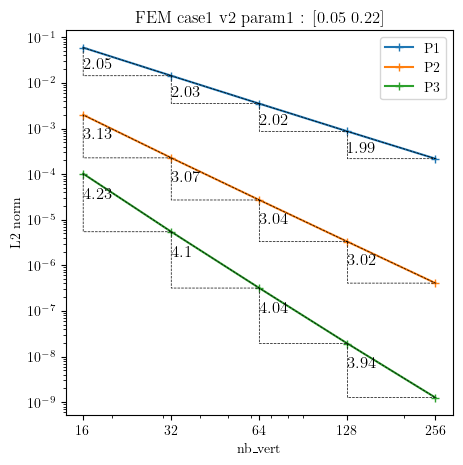

In [25]:
error_estimations.run_fem_alldeg(new_run=True,plot_cvg=True)

### Run Add

In [26]:
# degree = 1
# df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=True)

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
V created with  16  vertices and degree  1  : h = 0.29619219587722484
V_theta created with  16  vertices and degree  10
Building point search tree to accelerate distance queries.
Computed bounding box tree with 899 nodes for 450 points.
nb_vert=16, norme_L2=0.00014773206464649175
V created with  32  vertices and degree  1  : h = 0.1433188044567221
V_theta created with  32  vertices and degree  10
nb_vert=32, norme_L2=3.6663128772734336e-05
V created with  64  vertices and degree  1  : h = 0.07052195139934005
V_theta created with  64  vertices and degree  10
nb_vert=64, norme_L2=9.019673240099635e-06
V created with  128  vertices and degree  1  : h = 0.03498333022172013
V_theta created with  128  vertices and degree  10
nb_vert=128, norme_L2=2.2323431652643988e-06
V created with  256  vertices and degree  1  : h = 0.017423070345719664
V_theta created with  256  ve

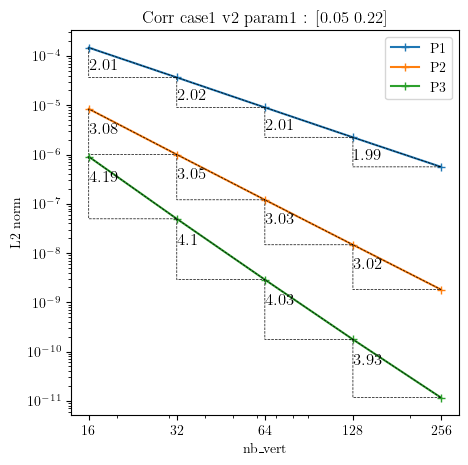

In [27]:
error_estimations.run_corr_alldeg(u_theta,new_run=True,plot_cvg=True)

### Save results

Convergence plots :

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/cvg/param1/FEM_case1_v2_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/cvg/param1/FEM_case1_v2_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/cvg/param1/FEM_case1_v2_param1_degree3.csv


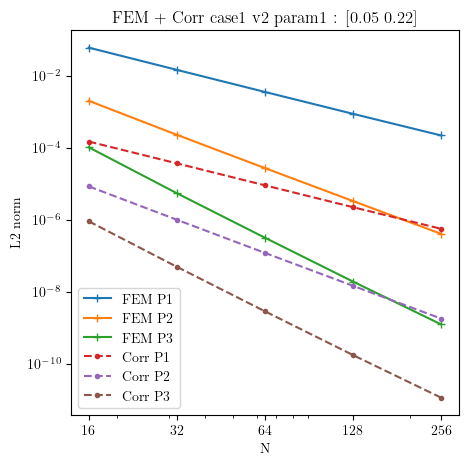

In [28]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [29]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp

Reaching a given precision :

In [30]:
from modfenics.error_estimations.compare import CompareMethodsMeshSize,CompareMethodsDoFs
get_N = CompareMethodsMeshSize(error_estimations)
get_dofs = CompareMethodsDoFs(error_estimations)

In [31]:
get_N.save_tab_given_precisions_alldeg_allM()

In [32]:
get_dofs.save_tab_given_precisions_alldeg_allM(u_theta,tab_M=None)

## degree=1
# given_precision=0.001
V created with  119  vertices and degree  1  : h = 0.03765155032337691
V created with  6  vertices and degree  1  : h = 0.8885765876316732
# given_precision=0.0001
V created with  379  vertices and degree  1  : h = 0.011753658566557199
V created with  19  vertices and degree  1  : h = 0.24682682989768734
## degree=2
# given_precision=0.0001
V created with  42  vertices and degree  2  : h = 0.10836299849166771
V created with  7  vertices and degree  2  : h = 0.7404804896930615
# given_precision=1e-05
V created with  89  vertices and degree  2  : h = 0.05048730611543689
V created with  15  vertices and degree  2  : h = 0.31734878129702676
## degree=3
# given_precision=1e-05
V created with  28  vertices and degree  3  : h = 0.16455121993179198
V created with  9  vertices and degree  3  : h = 0.5553603672697958
# given_precision=1e-06
V created with  48  vertices and degree  3  : h = 0.09452942421613611
V created with  16  vertices and degree  3  : h = 0

## Gains

### Imports

In [33]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

In [34]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir)
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/


### Run FEM

In [35]:
# degree = 1
# df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

In [36]:
gains_enhanced_fem.run_fem_alldeg(new_run=True)

## Run errrors with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  1  : h = 0.23383594411359887
V_theta created with  20  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  1  : h = 0.11392007533739443
V_theta created with  40  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 ## Run errrors with FEM for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  2  : h = 0.23383594411359887
V_theta created with  20  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35

### Run PINNs

In [37]:
# degree = 1
# df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

In [38]:
gains_enhanced_fem.run_pinns_alldeg(u_theta,new_run=True)

## Run errrors with PINNs for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  1  : h = 0.23383594411359887
V_theta created with  20  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  1  : h = 0.11392007533739443
V_theta created with  40  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 ## Run errrors with PINNs for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  2  : h = 0.23383594411359887
V_theta created with  20  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 3

### Run Add

In [39]:
# degree = 1
# df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

In [40]:
gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=True)

## Run errrors with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  1  : h = 0.23383594411359887
V_theta created with  20  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  1  : h = 0.11392007533739443
V_theta created with  40  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 ## Run errrors with Corr for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  2  : h = 0.23383594411359887
V_theta created with  20  vertices and degree  10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 

### Compare methods

In [41]:
degree = 1
# df_errors = compare_gains_methods.create_dferrors_deg_allM(degree)
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/FEM_errors_case1_v2_degree1.csv


In [42]:
compare_gains_methods.create_dataframes_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/FEM_errors_case1_v2_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/FEM_errors_case1_v2_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/FEM_errors_case1_v2_degree3.csv


In [43]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/FEM_errors_case1_v2_degree1.csv
method         PINNs                            FEM                       
type             min     max    mean    std     min     max    mean    std
method n_vert                                                             
Corr   20      15.22   62.57   40.13  12.39  135.63  539.85  381.01  97.62
       40      60.86  255.47  162.29  50.53  135.00  523.28  372.32  93.39


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


In [44]:
compare_gains_methods.save_stats_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/FEM_errors_case1_v2_degree1.csv
method         PINNs                            FEM                       
type             min     max    mean    std     min     max    mean    std
method n_vert                                                             
Corr   20      15.22   62.57   40.13  12.39  135.63  539.85  381.01  97.62
       40      60.86  255.47  162.29  50.53  135.00  523.28  372.32  93.39


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/FEM_errors_case1_v2_degree2.csv
method           PINNs                                 FEM                  \
type               min       max     mean      std     min     max    mean   
method n_vert                                                                
Corr   20       272.98   1540.07   848.95   320.44  105.32  262.62  202.71   
       40      2326.09  13031.61  7191.57  2723.23  104.25  258.09  199.21   

method                
type             std  
method n_vert         
Corr   20      39.54  
       40      38.36  


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version2/gains/FEM_errors_case1_v2_degree3.csv
method            PINNs                                    FEM          \
type                min        max       mean       std    min     max   
method n_vert                                                            
Corr   20       3755.48   22140.48   11513.92   4907.93  65.16  135.36   
       40      68023.55  401223.21  208003.76  88534.21  64.83  135.18   

method                        
type             mean    std  
method n_vert                 
Corr   20      107.06  18.63  
       40      106.93  18.58  


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
